In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import species


In [2]:
from scipy.interpolate import interp1d,CubicSpline,PchipInterpolator


In [3]:
press = np.logspace(-6,3,100)
nnodes = 2
temperature_points = np.array([10,300,900,1000])
cs = PchipInterpolator(np.linspace(np.log10(press[0]),
                             np.log10(press[-1]),
                             nnodes+2), 
                 temperature_points)

interpolated_temps = cs(np.log10(press))

lintemps = np.interp(np.log10(press),
                    np.linspace(np.log10(press[0]),
                             np.log10(press[-1]),
                             nnodes+2),
                    temperature_points)

In [4]:
nnodes = 4
temperature_points = np.array([10,20,100,600,500,1000])
cs2 = PchipInterpolator(np.linspace(np.log10(press[0]),
                             np.log10(press[-1]),
                             nnodes+2), 
                 temperature_points)

interpolated_temps2 = cs2(np.log10(press))



(1000.0, 1e-06)

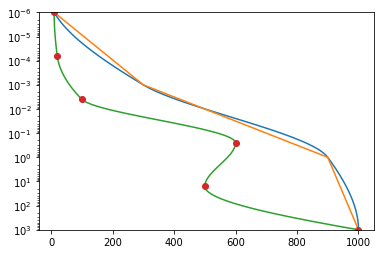

In [5]:
plt.plot(interpolated_temps,press)
plt.plot(lintemps,press)
plt.plot(interpolated_temps2,press)
plt.plot(temperature_points,
         10**np.linspace(np.log10(press[0]),
                             np.log10(press[-1]),
                             nnodes+2),linewidth = 0,marker = 'o')
plt.yscale('log')
plt.ylim(1e3,1e-6)

In [9]:
gamma = 0.1
weighted_temp_prior = -0.5*np.sum((interpolated_temps[2:]-2*interpolated_temps[1:-1]+interpolated_temps[:-2])**2)/gamma
weighted_temp_prior -= 0.5*np.log(2*np.pi*gamma)

sum_prior = 0
for i in range(1,interpolated_temps2.shape[0]-1):
    sum_prior += ((interpolated_temps2[i+1]-2*interpolated_temps2[i]+interpolated_temps2[i-1])**2)
sum_prior *= -1/(2*gamma) 
sum_prior -= 0.5*np.log(2*np.pi*gamma)

print(weighted_temp_prior,sum_prior)




-183.29999210438385 -1944.7631997691471


In [7]:
print(interpolated_temps[1:].shape,interpolated_temps[1:-1].shape)

(99,) (98,)


0
1


[None, None]

In [49]:
from scipy.special import erfcinv, gamma
def inverse_gamma_prior(cube, a, b):
    return ((b**a)/gamma(a)) * (1/cube)**(a+1) * np.exp(-b/cube)

(array([1.766e+03, 1.476e+03, 1.180e+03, 9.720e+02, 8.130e+02, 7.180e+02,
        5.550e+02, 4.190e+02, 3.650e+02, 2.880e+02, 2.740e+02, 1.880e+02,
        1.670e+02, 1.400e+02, 1.200e+02, 1.040e+02, 8.500e+01, 7.200e+01,
        5.800e+01, 5.200e+01, 3.900e+01, 3.900e+01, 1.900e+01, 2.000e+01,
        9.000e+00, 1.200e+01, 7.000e+00, 9.000e+00, 5.000e+00, 7.000e+00,
        2.000e+00, 5.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-4.30094877, -4.13424532, -3.96754187, -3.80083842, -3.63413497,
        -3.46743152, -3.30072807, -3.13402462, -2.96732117, -2.80061772,
        -2.63391426, -2.46721081, -2.30050736, -2.13380391, -1.96710046,
        -1.80039701, -1.63369356, -1.46699011, -1.30028666, -1.13358321,
        -0.96687976, -0.80017631, -0.63347286, -0.46676941, -0.30006596,
        -0.

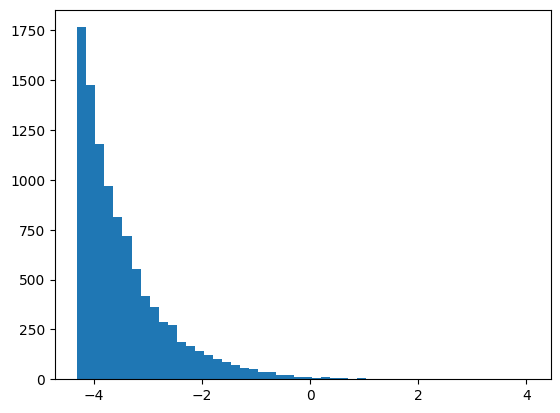

In [65]:
xs = np.random.uniform(size=10000)
ys = inverse_gamma_prior(xs,1,5e-5)
plt.hist(np.log10(ys),bins=50)
